<a href="https://colab.research.google.com/github/BarryS27/Iris-Flower-Data-Analysis/blob/main/Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df.value_counts(df.species)

,count
species,
setosa,50
versicolor,50
virginica,50


In [57]:
print(df.groupby("species").mean())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [58]:
species = {
"setosa": df[df["species"] == "setosa"],
"versicolor": df[df["species"] == "versicolor"],
"virginica": df[df["species"] == "virginica"]
}

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

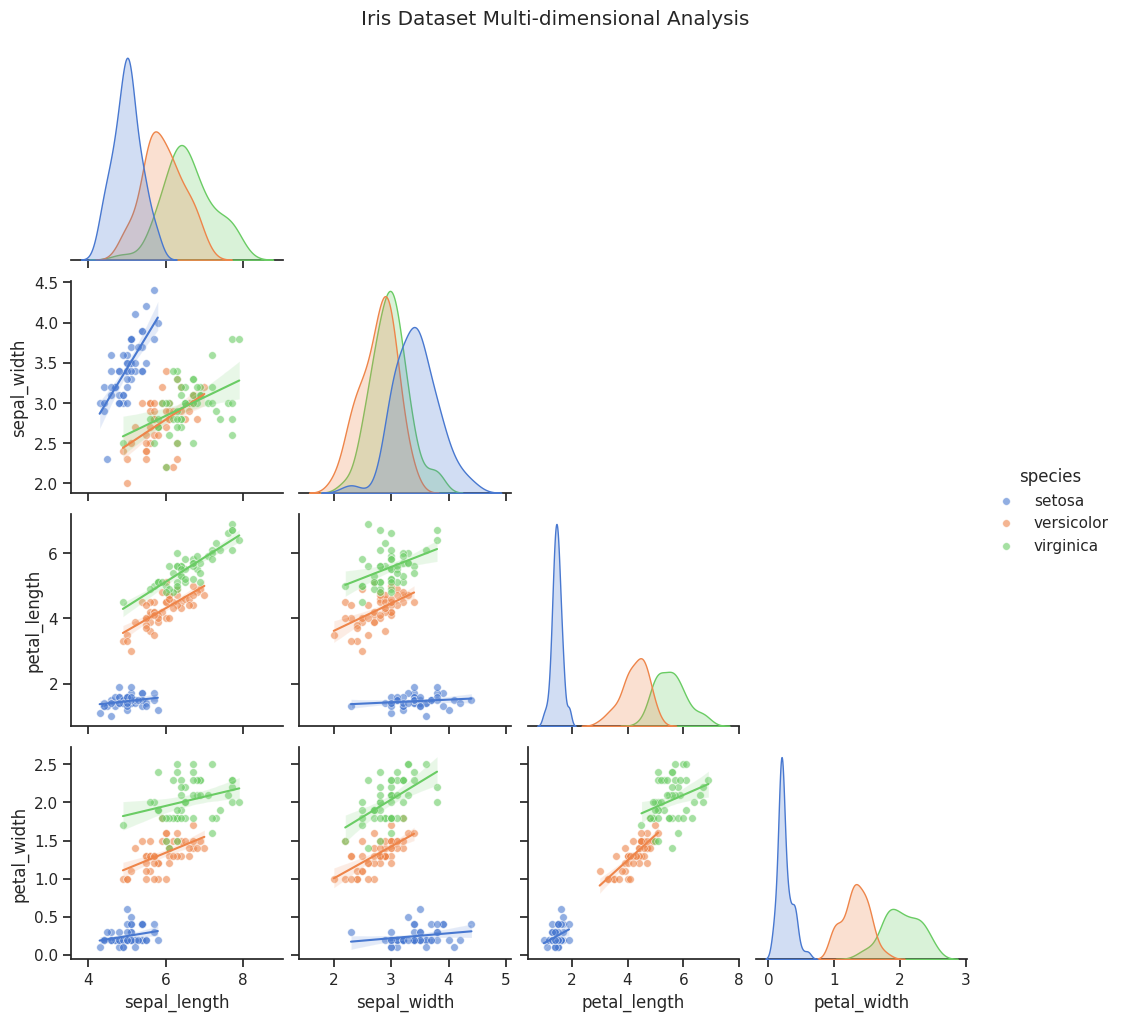

In [59]:
sns.set_style("ticks")

sns.pairplot(
    data=df,
    hue="species",
    kind="reg",
    diag_kind="kde",
    palette="muted",
    corner=True,
    plot_kws={
        "scatter_kws": {
          "alpha": 0.6,
          "s": 30,
          "edgecolor": "white",
          "linewidths": 0.5
        },
        "line_kws": {"linewidth": 1.5}
    }
)

plt.suptitle("Iris Dataset Multi-dimensional Analysis", y=1.02)
plt.show()

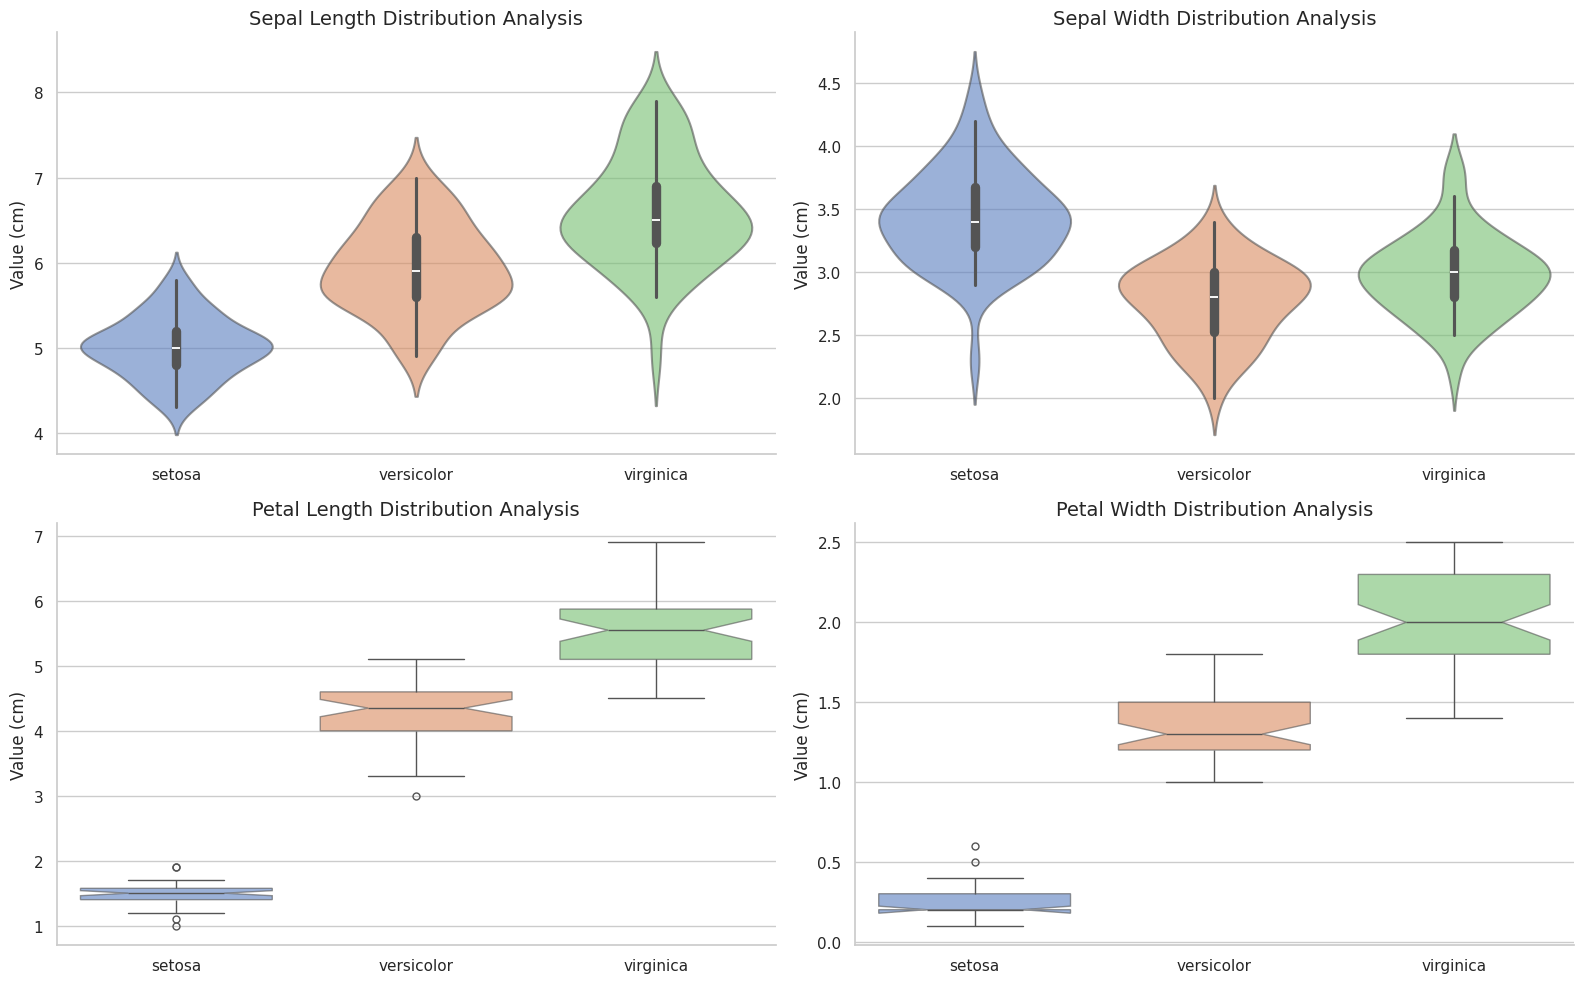

In [60]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)

    if i < 2:
        sns.violinplot(
            data=df,
            hue="species",
            x="species",
            y=feature,
            palette="muted",
            inner="box",
            linewidth=1.5,
            legend=False,
            alpha=0.6
        )
    else:
        sns.boxplot(
            data=df,
            hue="species",
            x="species",
            y=feature,
            palette="muted",
            notch=True,
            fliersize=5,
            legend=False,
            boxprops=dict(alpha=0.6)
        )

    plt.title(f"{feature.replace('_', ' ').title()} Distribution Analysis", fontsize=14)
    plt.xlabel("")
    plt.ylabel("Value (cm)", fontsize=12)
    sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()